<a href="https://colab.research.google.com/github/chetan-957/Data-Management-sp2025/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring the Relationship Between Economic Development & Food Security**

### Selecting the Datasets (Why These Data?)
For this project, we are using two key datasets to explore the relationship between economic development & food security across countries.

### 📊 Datasets Used:

✅ FAOSTAT Food Balance Sheets (from FAO)

link: https://www.fao.org/faostat/en/#data/FBS

Covers food supply, production, imports/exports, and nutritional indicators.
Tracks food availability & consumption trends from 2010 to 2023.
Key variables: Food supply (kcal/capita), protein & fat supply, food losses, stock variation.


✅ World Bank WDI (World Development Indicators)

link: https://databank.worldbank.org/source/world-development-indicators#

Covers economic & trade data for all countries from 1980-2023.
Key variables: GDP per capita, GNI per capita, Trade as % of GDP, Gini Index (income inequality).


✅ Annual-CO2-Emissions

link:https://ourworldindata.org/co2-and-greenhouse-gas-emissions

Covers the Annual CO2 emissions over the years.

📌 Why These Data?
These datasets allow us to analyze global food security patterns while linking them to economic growth & inequality. This helps answer critical questions like:
1️⃣ Does GDP per capita correlate with better food security?
2️⃣ Do trade policies affect food supply fluctuations?
3️⃣ Is income inequality (Gini Index) linked to undernourishment?
4️⃣ How have food security trends evolved over time?



### 1️⃣ Research Focus
We aim to analyze how economic indicators (GDP per capita, GNI, Gini Index, Trade % of GDP) relate to food security metrics such as:

 ✅ Food availability (kcal/capita/day, food supply quantity)

 ✅ Nutritional intake (protein & fat supply per capita)

 ✅ Food production & trade (imports, exports, domestic supply)

 ✅ Sustainability (food losses & stock variation)


### 2️⃣ Key Research Questions (Unique Approach)
Instead of generic questions, we’re making this project unique by asking:

 1️⃣ Does economic growth lead to more diverse & nutritious food supply?
Example: Do wealthier countries consume more protein & fat than low-income ones?

 2️⃣ Does trade openness impact food security?
Example: Do highly import-dependent nations have more food variability or insecurity?

 3️⃣ Are countries with higher inequality (Gini Index) more vulnerable to food shortages?
Example: Do nations with high income gaps have poorer nutritional outcomes?

 4️⃣ Has food security improved over time as economies grow?
Example: Are there long-term trends (1980-2023) showing improvement in food access?


### **1️⃣ Load & Inspect Datasets**

In [1]:
import gdown
import pandas as pd

# Google Drive file ID
file_id = "1QB05L0xO9XE6l-U5NQNrAkWsUPxOZpF_"

# Direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Define output file name
output_file = "FoodBalanceSheets_E_All_Data.csv"

# Download the file
gdown.download(download_url, output_file, quiet=False)

# Load CSV
faostat_df = pd.read_csv(output_file, encoding="latin1")

# Display sample data
faostat_df.head()


Downloading...
From (original): https://drive.google.com/uc?id=1QB05L0xO9XE6l-U5NQNrAkWsUPxOZpF_
From (redirected): https://drive.google.com/uc?id=1QB05L0xO9XE6l-U5NQNrAkWsUPxOZpF_&confirm=t&uuid=207e6670-5520-4c46-a905-3c8b5f435f11
To: /content/FoodBalanceSheets_E_All_Data.csv
100%|██████████| 119M/119M [00:02<00:00, 44.4MB/s]


,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Unit,Y2010,...,Y2019N,Y2020,Y2020F,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N
0,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,1000 No,28189.67,...,NaN,38972.23,X,NaN,40099.46,X,NaN,41128.77,X,NaN
1,2,'004,Afghanistan,2901,'S2901,Grand Total,664,Food supply (kcal/capita/day),kcal/cap/d,2208.00,...,NaN,2266.00,E,NaN,2240.00,E,NaN,2243.00,E,NaN
2,2,'004,Afghanistan,2901,'S2901,Grand Total,661,Food supply (kcal),million Kcal,22714261.33,...,NaN,32236668.33,E,NaN,32780360.22,E,NaN,33679315.09,E,NaN
3,2,'004,Afghanistan,2901,'S2901,Grand Total,674,Protein supply quantity (g/capita/day),g/cap/d,65.76,...,NaN,63.37,E,NaN,61.22,E,NaN,61.03,E,NaN
4,2,'004,Afghanistan,2901,'S2901,Grand Total,671,Protein supply quantity (t),t,676666.08,...,NaN,901465.91,E,NaN,895962.82,E,NaN,916131.81,E,NaN


Using the `gdown` package, a dataset was downloaded from Google Drive using its unique file ID and saved as `"FoodBalanceSheets_E_All_Data.csv"`. The file was then loaded into a **pandas DataFrame** using `pd.read_csv()`, with `encoding="latin1"` to handle special characters. Finally, `head()` was used to display the first few rows, providing an overview of the dataset, which includes information on food supply, consumption, imports, exports, and production for different countries.

In [2]:
faostat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390590 entries, 0 to 390589
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        390590 non-null  int64  
 1   Area Code (M49)  390590 non-null  object 
 2   Area             390590 non-null  object 
 3   Item Code        390590 non-null  int64  
 4   Item Code (FBS)  390590 non-null  object 
 5   Item             390590 non-null  object 
 6   Element Code     390590 non-null  int64  
 7   Element          390590 non-null  object 
 8   Unit             390590 non-null  object 
 9   Y2010            352794 non-null  float64
 10  Y2010F           352794 non-null  object 
 11  Y2010N           0 non-null       float64
 12  Y2011            352261 non-null  float64
 13  Y2011F           352261 non-null  object 
 14  Y2011N           0 non-null       float64
 15  Y2012            354469 non-null  float64
 16  Y2012F           354469 non-null  obje

In [3]:
# GitHub Raw File Link
github_url = "https://raw.githubusercontent.com/chetan-957/Data-Management-sp2025/main/P_Data_Extract_From_World_Development_Indicators.xlsx"

# Load WDI Excel file directly from GitHub
wdi_df = pd.read_excel(github_url, sheet_name="Data")

# Display sample data
wdi_df.tail()


,Country Name,Country Code,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
4123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4126,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4127,Last Updated: 01/28/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The code downloads an Excel file from GitHub and loads the "Data" sheet into a **pandas DataFrame** using `pd.read_excel()`. The `tail()` function displays the last five rows, providing a quick overview of the dataset’s structure and contents.

In [4]:
wdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   4125 non-null   object
 1   Country Code   4123 non-null   object
 2   Series Name    4123 non-null   object
 3   Series Code    4123 non-null   object
 4   1980 [YR1980]  4123 non-null   object
 5   1981 [YR1981]  4123 non-null   object
 6   1982 [YR1982]  4123 non-null   object
 7   1983 [YR1983]  4123 non-null   object
 8   1984 [YR1984]  4123 non-null   object
 9   1985 [YR1985]  4123 non-null   object
 10  1986 [YR1986]  4123 non-null   object
 11  1987 [YR1987]  4123 non-null   object
 12  1988 [YR1988]  4123 non-null   object
 13  1989 [YR1989]  4123 non-null   object
 14  1990 [YR1990]  4123 non-null   object
 15  1991 [YR1991]  4123 non-null   object
 16  1992 [YR1992]  4123 non-null   object
 17  1993 [YR1993]  4123 non-null   object
 18  1994 [YR1994]  4123 non-null

### **2️⃣ Extract Relevant Columns**

In [5]:
# Select only relevant elements from FAOSTAT
faostat_selected_elements = [
    "Food supply (kcal/capita/day)", "Food supply quantity (kg/capita/yr)",
    "Protein supply quantity (g/capita/day)", "Fat supply quantity (g/capita/day)",
    "Production (tonnes)", "Import Quantity (tonnes)", "Export Quantity (tonnes)",
    "Stock Variation (tonnes)", "Domestic supply quantity (tonnes)", "Losses (tonnes)"
]

# Filter FAOSTAT dataset
faostat_filtered = faostat_df[faostat_df["Element"].isin(faostat_selected_elements)]
faostat_filtered = faostat_filtered[["Area", "Item", "Element"] + [col for col in faostat_df.columns if col.startswith("Y")]]
faostat_filtered = faostat_filtered.rename(columns={"Area": "Country", "Item": "Food Category", "Element": "Metric"})

# Extract relevant indicators from WDI
wdi_selected_indicators = ["NY.GDP.PCAP.CD", "NY.GNP.PCAP.CD", "SI.POV.GINI", "NE.TRD.GNFS.ZS"]

wdi_filtered = wdi_df[wdi_df["Series Code"].isin(wdi_selected_indicators)]
wdi_filtered = wdi_filtered.rename(columns={"Country Name": "Country", "Series Name": "Indicator"})

# Clean year columns (remove " [YRxxxx]" format)
wdi_filtered.columns = [col.split(" [YR")[0] if " [YR" in col else col for col in wdi_filtered.columns]


This code **filters and processes** relevant data from the FAOSTAT and WDI datasets for further analysis.

#### **FAOSTAT Data Processing**:
1. **Selecting Key Food Security Metrics**  
   - Filtering only relevant food-related indicators (e.g., **calories, protein, fat supply, production, imports, exports, stock variations, losses**).
2. **Filtering the FAOSTAT Dataset**  
   - Keeping only rows where the `"Element"` column matches the selected food security metrics.  
   - Retaining only country (`"Area"`), food category (`"Item"`), metric (`"Element"`), and all **yearly data columns (`Yxxxx`)**.
   - Renaming columns:  
     - `"Area"` → `"Country"`  
     - `"Item"` → `"Food Category"`  
     - `"Element"` → `"Metric"`

#### **WDI Data Processing**:
1. **Selecting Economic Indicators**  
   - Extracts **GDP per capita, GNI per capita, Gini Index (inequality), and Trade (% of GDP)** from the WDI dataset.
2. **Filtering the WDI Dataset**  
   - Keeping only rows where the `"Series Code"` matches the selected indicators.  
   - Renameing columns:  
     - `"Country Name"` → `"Country"`  
     - `"Series Name"` → `"Indicator"`
3. **Cleaning Year Column Names**  
   - Removed **"[YRxxxx]"** from column names to standardize the format.

This prepares both datasets for **merging and further analysis** on the relationship between economic development and food security.

### **3️⃣ Handle Missing Data**

In [6]:
# Drop metadata columns (e.g., "Y2010F", "Y2010N") from FAOSTAT
faostat_filtered = faostat_filtered[[col for col in faostat_filtered.columns if not col.endswith(("F", "N"))]]

# Convert year columns to numeric in FAOSTAT
year_cols_fao = [col for col in faostat_filtered.columns if col.startswith("Y")]
faostat_filtered[year_cols_fao] = faostat_filtered[year_cols_fao].apply(pd.to_numeric, errors='coerce')

# Replace ".." in WDI dataset with NaN and convert year columns to numeric
wdi_filtered.replace("..", pd.NA, inplace=True)
year_cols_wdi = [col for col in wdi_filtered.columns if col.isdigit()]
wdi_filtered[year_cols_wdi] = wdi_filtered[year_cols_wdi].apply(pd.to_numeric, errors='coerce')

# Check missing data summary
print("FAOSTAT Missing Data Summary:\n", faostat_filtered.isnull().sum())
print("WDI Missing Data Summary:\n", wdi_filtered.isnull().sum())


FAOSTAT Missing Data Summary:
 Country             0
Food Category       0
Metric              0
Y2010            8589
Y2011            8651
Y2012            8090
Y2013            8058
Y2014            6383
Y2015            6357
Y2016            6334
Y2017            6046
Y2018            6160
Y2019            2526
Y2020            2034
Y2021            1901
Y2022            1911
dtype: int64
WDI Missing Data Summary:
 Country           0
Country Code      0
Indicator         0
Series Code       0
1980            437
1981            430
1982            426
1983            422
1984            416
1985            408
1986            402
1987            389
1988            394
1989            382
1990            343
1991            340
1992            306
1993            311
1994            305
1995            278
1996            279
1997            280
1998            266
1999            272
2000            254
2001            265
2002            236
2003            233
2004            2

This code **cleans and processes** the FAOSTAT and WDI datasets by handling metadata, data types, and missing values.

#### **FAOSTAT Data Cleaning**:
1. **Removed Unnecessary Metadata Columns**  
   - Dropped columns ending with `"F"` or `"N"` (e.g., `"Y2010F"`, `"Y2010N"`) that contain metadata instead of actual values.
2. **Converted Year Columns to Numeric**  
   - Identifies all year columns (`"Yxxxx"`) and converts them to numeric format, coercing any errors to `NaN`.

#### **WDI Data Cleaning**:
1. **Handles Missing Values**  
   - Replaced `".."` (used as missing value placeholders) with `NaN`.
2. **Converted Year Columns to Numeric**  
   - Identifies columns with numeric year names and converts them to numeric format.

#### **Missing Data Check**:
- Printed the **count of missing values** in both datasets to identify gaps in the data before merging and analysis.

### **4️⃣ Standardize Country Names**

In [7]:
# Dictionary for FAOSTAT to WDI country name mapping
country_name_mapping = {
    "Bolivia (Plurinational State of)": "Bolivia", "Iran (Islamic Republic of)": "Iran",
    "United Republic of Tanzania": "Tanzania", "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Republic of Korea": "Korea, Rep.", "Democratic People's Republic of Korea": "Korea, Dem. People's Rep.",
    "United States of America": "United States", "TÃ¼rkiye": "Turkey",
    "Democratic Republic of the Congo": "Congo, Dem. Rep.", "Congo": "Congo, Rep.",
    "CÃ´te d'Ivoire": "Côte d'Ivoire", "Iran": "Iran, Islamic Rep.", "Turkey": "Turkiye",
    "Venezuela": "Venezuela, RB"
}

# Apply the mapping
faostat_filtered["Country"] = faostat_filtered["Country"].replace(country_name_mapping)

# Remove non-country regions from FAOSTAT dataset
non_countries = {"Africa", "Asia", "Europe", "World", "Land Locked Developing Countries", "Small Island Developing States"}
faostat_filtered = faostat_filtered[~faostat_filtered["Country"].isin(non_countries)]


The above code **harmonizes country names** between FAOSTAT and WDI datasets and removes non-country regions.

#### **Country Name Standardization**:
1. **Created a Mapping Dictionary**  
   - Some country names in FAOSTAT differ from WDI (e.g., `"Bolivia (Plurinational State of)"` vs. `"Bolivia"`).  
   - The dictionary maps FAOSTAT country names to their WDI equivalents for consistency.
2. **Mapping**  
   - The `replace()` function updates the `"Country"` column in **FAOSTAT** to match WDI naming conventions.

#### **Removing Non-Country Entries**:
1. **Defined a Set of Non-Country Regions**  
   - Removes aggregate regions like `"Africa"`, `"Asia"`, `"Europe"`, `"World"`, and other non-country entities.
2. **Filtered Out These Entries**  
   - Uses `~faostat_filtered["Country"].isin(non_countries)` to **keep only actual countries**.

This ensures **consistent country names** across datasets and removes unnecessary regional aggregates before merging.

### **5️⃣ Merge FAOSTAT & WDI Data**

In [8]:
# Convert FAOSTAT from wide to long format
faostat_long = faostat_filtered.melt(id_vars=["Country", "Food Category", "Metric"],
                                     var_name="Year", value_name="Value")

# Clean Year column (remove "Y" prefix)
faostat_long["Year"] = faostat_long["Year"].str.replace("Y", "").astype(int)

# Convert WDI from wide to long format
wdi_long = wdi_filtered.melt(id_vars=["Country", "Indicator", "Series Code"], var_name="Year", value_name="Value")

# Ensure Year column is numeric
wdi_long = wdi_long[wdi_long["Year"].str.isnumeric()]
wdi_long["Year"] = wdi_long["Year"].astype(int)

# Use Outer Join to Keep All Years
merged_data = faostat_long.merge(wdi_long, on=["Country", "Year"], how="outer")

# Save the final merged dataset
merged_data.to_csv("Merged_FAOSTAT_WDI.csv", index=False)

# Display sample of merged dataset
print("Merged Dataset Sample:\n")
merged_data.head(5)


Merged Dataset Sample:



,Country,Food Category,Metric,Year,Value_x,Indicator,Series Code,Value_y
0,Afghanistan,NaN,NaN,1980,NaN,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN
1,Afghanistan,NaN,NaN,1980,NaN,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN
2,Afghanistan,NaN,NaN,1980,NaN,Gini index,SI.POV.GINI,NaN
3,Afghanistan,NaN,NaN,1980,NaN,Trade (% of GDP),NE.TRD.GNFS.ZS,NaN
4,Afghanistan,NaN,NaN,1981,NaN,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN


The above code **reshapes, merges, and saves** the FAOSTAT and WDI datasets into a single structured format.

#### **Reshaping FAOSTAT Data**:
1. **Converted from Wide to Long Format**  
   - Uses `melt()` to transform FAOSTAT data, where year columns (e.g., `"Y2010"`, `"Y2011"`) become a single `"Year"` column.
2. **Cleaned the `"Year"` Column**  
   - Removes the `"Y"` prefix and converts it to an integer format for consistency.

#### **Reshaping WDI Data**:
1. **Converted from Wide to Long Format**  
   - Uses `melt()` to transform WDI data, keeping `"Country"`, `"Indicator"`, and `"Series Code"`, while moving year data into a `"Year"` column.
2. **Ensured `"Year"` is Numeric**  
   - Removes any non-numeric values in `"Year"`, then converts it to an integer.

#### **Merging the Datasets**:
1. **Performed an Outer Join**  
   - Merges FAOSTAT and WDI data on `"Country"` and `"Year"` while keeping all available years using an **outer join**.

#### **Saving and Displaying Data**:
1. **Saved the Final Merged Dataset**  
   - Writes the cleaned and merged data into `"Merged_FAOSTAT_WDI.csv"`.
2. **Displays a Sample**  
   - Prints the first five rows to verify the merging process.

Now This final dataset is now structured for **further analysis on economic development and food security.**

In [9]:
# Pivot Economic Indicators to Columns (for WDI `Value_y`)
pivoted_wdi = merged_data.pivot_table(
    index=["Country", "Food Category", "Metric", "Year"],
    columns="Indicator",
    values="Value_y"
).reset_index()

# Pivot FAOSTAT Metrics (for `Value_x`)
pivoted_fao = merged_data[["Country", "Food Category", "Metric", "Year", "Value_x"]].drop_duplicates()

# Merge FAOSTAT and WDI pivoted data
improved_data = pd.merge(pivoted_fao, pivoted_wdi, on=["Country", "Food Category", "Metric", "Year"], how="left")

# Rename columns for better readability
improved_data.rename(columns={
    "GDP per capita (current US$)": "GDP per capita (US$)",
    "GNI per capita, Atlas method (current US$)": "GNI per capita (US$)",
    "Gini index": "Gini Index",
    "Trade (% of GDP)": "Trade (% of GDP)",
    "Value_x": "FAOSTAT Metric Value"
}, inplace=True)

# Save the cleaned CSV
improved_data.to_csv("Improved_Merged_Data.csv", index=False)

# Display sample of cleaned data
improved_data.head(20)



,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP)
0,Afghanistan,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,1981,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,1982,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,1983,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,1984,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,NaN,NaN,1985,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,NaN,NaN,1986,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,NaN,NaN,1987,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,NaN,NaN,1988,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,NaN,NaN,1989,NaN,NaN,NaN,NaN,NaN


In [10]:
improved_data.tail(30)

,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP)
1209908,Zimbabwe,"Marine Fish, Other",Protein supply quantity (g/capita/day),2022,0.02,2040.552459,1960.0,NaN,64.763608
1209909,Zimbabwe,"Marine Fish, Other",Fat supply quantity (g/capita/day),2022,0.01,2040.552459,1960.0,NaN,64.763608
1209910,Zimbabwe,Crustaceans,Food supply quantity (kg/capita/yr),2022,0.00,2040.552459,1960.0,NaN,64.763608
1209911,Zimbabwe,Crustaceans,Food supply (kcal/capita/day),2022,0.00,2040.552459,1960.0,NaN,64.763608
1209912,Zimbabwe,Crustaceans,Protein supply quantity (g/capita/day),2022,0.00,2040.552459,1960.0,NaN,64.763608
1209913,Zimbabwe,Crustaceans,Fat supply quantity (g/capita/day),2022,0.00,2040.552459,1960.0,NaN,64.763608
1209914,Zimbabwe,Cephalopods,Food supply quantity (kg/capita/yr),2022,0.00,2040.552459,1960.0,NaN,64.763608
1209915,Zimbabwe,Cephalopods,Food supply (kcal/capita/day),2022,0.00,2040.552459,1960.0,NaN,64.763608
1209916,Zimbabwe,Cephalopods,Protein supply quantity (g/capita/day),2022,0.00,2040.552459,1960.0,NaN,64.763608
1209917,Zimbabwe,Cephalopods,Fat supply quantity (g/capita/day),2022,0.00,2040.552459,1960.0,NaN,64.763608


This code **reshapes, merges, and finalizes** the dataset for improved readability and analysis.

### **Reshaping WDI Data**:
1. **Pivoted Economic Indicators into Columns**  
   - Converted `Indicator` values (e.g., GDP, GNI, Gini Index, Trade % of GDP) into separate columns.
   - Used `pivot_table()` to restructure the dataset, making economic indicators easier to analyze.

### **Reshaping FAOSTAT Data**:
2. **Pivoted FAOSTAT Metrics**  
   - Extracted `"Value_x"` (FAOSTAT metric values) while keeping `"Country"`, `"Food Category"`, `"Metric"`, and `"Year"`.

### **Merging the Reshaped Data**:
3. **Combined FAOSTAT and WDI Data**  
   - Merged the pivoted FAOSTAT and WDI datasets using a **left join** to ensure all FAOSTAT values are retained.

### **Renaming Columns for Clarity**:
4. **Standardized Economic Indicator Names**  
   - Renamed columns for better readability:
     - `"GDP per capita (current US$)"` → `"GDP per capita (US$)"`
     - `"GNI per capita, Atlas method (current US$)"` → `"GNI per capita (US$)"`
     - `"Gini index"` → `"Gini Index"`
     - `"Trade (% of GDP)"` remains unchanged.
     - `"Value_x"` (FAOSTAT metric values) is renamed `"FAOSTAT Metric Value"`.

### **Saving and Displaying Final Data**:
5. **Saving the Cleaned Dataset**  
   - Writes the final structured dataset into `"Improved_Merged_Data.csv"`.
6. **Display a Sample**  
   - Prints the first 20 rows to verify the transformation.

This final dataset is **ready for statistical analysis** on the relationship between **economic indicators and food security metrics**.

In [11]:
# Load the Improved Merged Data
file_path = "Improved_Merged_Data.csv"

# Display dataset information
improved_data.info()

# Display first few rows
improved_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209938 entries, 0 to 1209937
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Country               1209938 non-null  object 
 1   Food Category         1202574 non-null  object 
 2   Metric                1202574 non-null  object 
 3   Year                  1209938 non-null  int64  
 4   FAOSTAT Metric Value  1130794 non-null  float64
 5   GDP per capita (US$)  909344 non-null   object 
 6   GNI per capita (US$)  896423 non-null   object 
 7   Gini Index            361877 non-null   object 
 8   Trade (% of GDP)      821360 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 83.1+ MB


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP)
0,Afghanistan,NaN,NaN,1980,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,1981,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,1982,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,1983,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,1984,NaN,NaN,NaN,NaN,NaN


The above code loads the **final cleaned dataset** (`"Improved_Merged_Data.csv"`) into a pandas DataFrame. The `info()` function provides a summary of columns, data types, and missing values, while `head()` displays the first few rows to verify the structure and correctness of the merged FAOSTAT and WDI data.

In [12]:
# Load the dataset from Colab's file path
file_path = "/content/Improved_Merged_Data.csv"
df = pd.read_csv(file_path)

# Convert 'Year' column to numeric (in case it is stored as a string)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter dataset to only include data from 2010 onwards
df_filtered = df[df['Year'] >= 2010]

# Drop rows with missing values in key columns (Food Security & Economic Indicators)
key_columns = [
    'FAOSTAT Metric Value', 'GDP per capita (US$)', 'GNI per capita (US$)', 'Gini Index', 'Trade (% of GDP)'
]
df_filtered = df_filtered.dropna(subset=key_columns, how='all')

# Save the cleaned dataset in Colab
filtered_file_path = "/content/Filtered_Improved_Merged_Data_2010_Onwards.csv"
df_filtered.to_csv(filtered_file_path, index=False)

# Display first 10 rows of the filtered dataset
df_filtered.head(10)



,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP)
30,Afghanistan,Grand Total,Food supply (kcal/capita/day),2010,2208.00,560.621505,530.0,NaN,NaN
31,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),2010,65.76,560.621505,530.0,NaN,NaN
32,Afghanistan,Grand Total,Fat supply quantity (g/capita/day),2010,38.06,560.621505,530.0,NaN,NaN
33,Afghanistan,Vegetal Products,Food supply (kcal/capita/day),2010,2008.00,560.621505,530.0,NaN,NaN
34,Afghanistan,Vegetal Products,Protein supply quantity (g/capita/day),2010,53.30,560.621505,530.0,NaN,NaN
35,Afghanistan,Vegetal Products,Fat supply quantity (g/capita/day),2010,24.92,560.621505,530.0,NaN,NaN
36,Afghanistan,Animal Products,Food supply (kcal/capita/day),2010,200.00,560.621505,530.0,NaN,NaN
37,Afghanistan,Animal Products,Protein supply quantity (g/capita/day),2010,12.46,560.621505,530.0,NaN,NaN
38,Afghanistan,Animal Products,Fat supply quantity (g/capita/day),2010,13.14,560.621505,530.0,NaN,NaN
39,Afghanistan,Cereals - Excluding Beer,Food supply quantity (kg/capita/yr),2010,202.73,560.621505,530.0,NaN,NaN


This code **loads, cleans, and filters** the dataset for analysis from 2010 onward.

1. **Loading the dataset** (`"Improved_Merged_Data.csv"`) and ensures the `"Year"` column is numeric.  
2. **Filtered the data** to include only records from **2010 onwards** for recent trends.  
3. **Dropped the rows with missing values** in key columns (`FAOSTAT metrics & economic indicators`).  
4. **Saving the cleaned dataset** as `"Filtered_Improved_Merged_Data_2010_Onwards.csv"`.  
5. **Displaying the first 10 rows** to verify the filtering process.

In [13]:
# Check missing values and percentage
missing_data = df_filtered.isnull().sum()
missing_percentage = (missing_data / len(df_filtered)) * 100

# Display missing value summary
print("Missing Data Summary:\n", pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage
}))


Missing Data Summary:
                       Missing Values  Percentage (%)
Country                            0        0.000000
Food Category                      0        0.000000
Metric                             0        0.000000
Year                               0        0.000000
FAOSTAT Metric Value           58954        4.955167
GDP per capita (US$)          280404       23.568352
GNI per capita (US$)          293325       24.654381
Gini Index                    827871       69.583727
Trade (% of GDP)              368388       30.963532


The above code **analyzes missing values** in the filtered dataset.  

1. **Calculating Missing Values**  
   - Used `isnull().sum()` to count missing values in each column.  

2. **Computed Missing Percentage**  
   - Divided the missing count by the total number of rows and multiplies by 100 to get the percentage.  

3. **Displaying the Summary**  
   - Printed a **DataFrame** showing both the **number and percentage of missing values** for each column, helping identify gaps in the data.

In [14]:
# Impute missing values for economic indicators with country-level median
df_filtered['GDP per capita (US$)'] = df_filtered.groupby('Country')['GDP per capita (US$)'].transform(
    lambda x: x.fillna(x.median())
)
df_filtered['GNI per capita (US$)'] = df_filtered.groupby('Country')['GNI per capita (US$)'].transform(
    lambda x: x.fillna(x.median())
)
df_filtered['Gini Index'] = df_filtered.groupby('Country')['Gini Index'].transform(
    lambda x: x.fillna(x.median())
)
df_filtered['Trade (% of GDP)'] = df_filtered.groupby('Country')['Trade (% of GDP)'].transform(
    lambda x: x.fillna(x.median())
)

# Impute missing values for food security metrics with category-level median
df_filtered['FAOSTAT Metric Value'] = df_filtered.groupby(['Food Category', 'Metric'])['FAOSTAT Metric Value'].transform(
    lambda x: x.fillna(x.median())
)
df_filtered.head(5)

,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP)
30,Afghanistan,Grand Total,Food supply (kcal/capita/day),2010,2208.00,560.621505,530.0,NaN,51.411716
31,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),2010,65.76,560.621505,530.0,NaN,51.411716
32,Afghanistan,Grand Total,Fat supply quantity (g/capita/day),2010,38.06,560.621505,530.0,NaN,51.411716
33,Afghanistan,Vegetal Products,Food supply (kcal/capita/day),2010,2008.00,560.621505,530.0,NaN,51.411716
34,Afghanistan,Vegetal Products,Protein supply quantity (g/capita/day),2010,53.30,560.621505,530.0,NaN,51.411716


The above code **fills missing values** in the dataset using the median values at different levels.

### **Imputing Missing Economic Indicators**:
1. **Filled missing values for GDP, GNI, Gini Index, and Trade (% of GDP)**  
   - Used `groupby('Country')` to compute the **country-level median** for each indicator.  
   - Applied `.transform(lambda x: x.fillna(x.median()))` to **replace missing values** with the median for that country.

### **Imputing Missing Food Security Metrics**:
2. **Filling missing values for FAOSTAT metrics**  
   - Used `groupby(['Food Category', 'Metric'])` to compute the **median value for each food category and metric**.  
   - Missing values are replaced with the corresponding **category-level median**.

### **Final Check**:
3. **Displays the first five rows** to verify that missing values have been imputed correctly.

In [15]:
# Drop rows where missing values still persist
df_cleaned = df_filtered.dropna()

# Save cleaned dataset
df_cleaned.to_csv("/content/Cleaned_Improved_Merged_Data_2010_Onwards.csv", index=False)
print("Cleaned data saved successfully.")
df_filtered.head(5)

Cleaned data saved successfully.


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP)
30,Afghanistan,Grand Total,Food supply (kcal/capita/day),2010,2208.00,560.621505,530.0,NaN,51.411716
31,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),2010,65.76,560.621505,530.0,NaN,51.411716
32,Afghanistan,Grand Total,Fat supply quantity (g/capita/day),2010,38.06,560.621505,530.0,NaN,51.411716
33,Afghanistan,Vegetal Products,Food supply (kcal/capita/day),2010,2008.00,560.621505,530.0,NaN,51.411716
34,Afghanistan,Vegetal Products,Protein supply quantity (g/capita/day),2010,53.30,560.621505,530.0,NaN,51.411716


The code **removes any remaining missing values** using `dropna()` and saves the fully cleaned dataset as `"Cleaned_Improved_Merged_Data_2010_Onwards.csv"`. It then prints a confirmation message and displays the first five rows to verify the final cleaned data.

### **Average Food Metrics Across Food Categories**

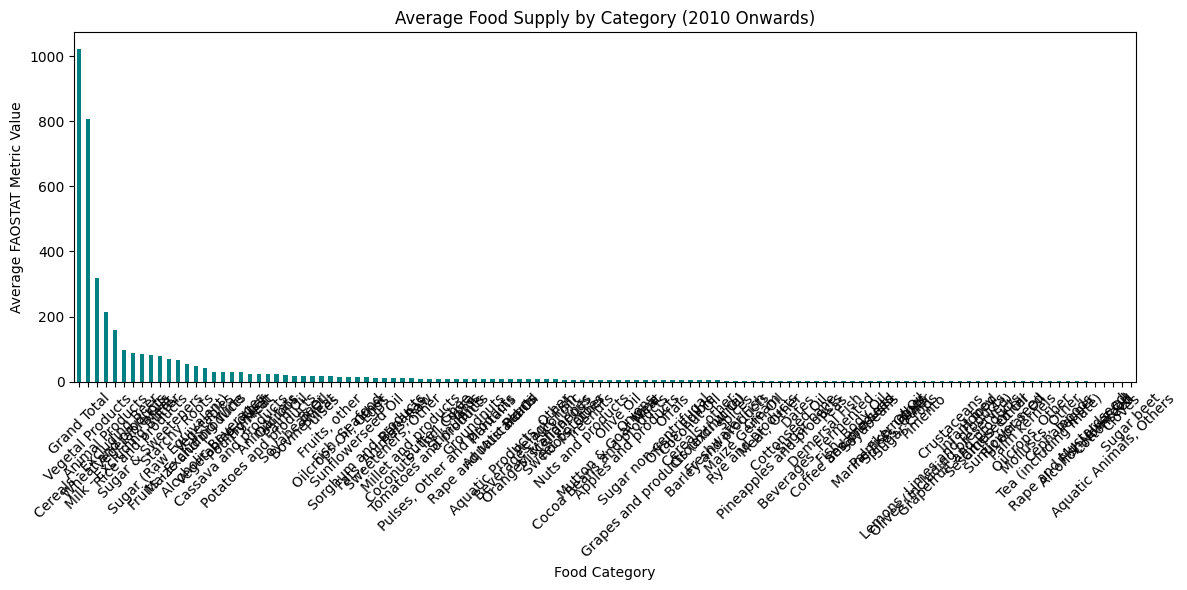

In [16]:
import matplotlib.pyplot as plt
# Group by Food Category and calculate mean for food metrics
food_metrics = df_filtered.groupby('Food Category')['FAOSTAT Metric Value'].mean().sort_values(ascending=False)

# Bar plot for food supply across categories
plt.figure(figsize=(12, 6))
food_metrics.plot(kind='bar', color='teal')
plt.title("Average Food Supply by Category (2010 Onwards)")
plt.ylabel("Average FAOSTAT Metric Value")
plt.xlabel("Food Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Food Categories with High Supply:**

**Categories like Cereals** - Excluding Beer or Wheat and Products are likely to dominate food supply, as they form staple diets for many countries.
Animal Products and Vegetal Products may show moderate contributions, with Animal Products contributing more to protein and fat availability.

**Food Categories with Low Supply:**
Categories like Barley and Products or Aquatic Animals may show low average supply, as they are consumed in smaller quantities or in specific regions.
This highlights the diversity of food supply and indicates which categories are staples vs. supplementary.



### **Correlation Between Economic Indicators and Food Metrics**

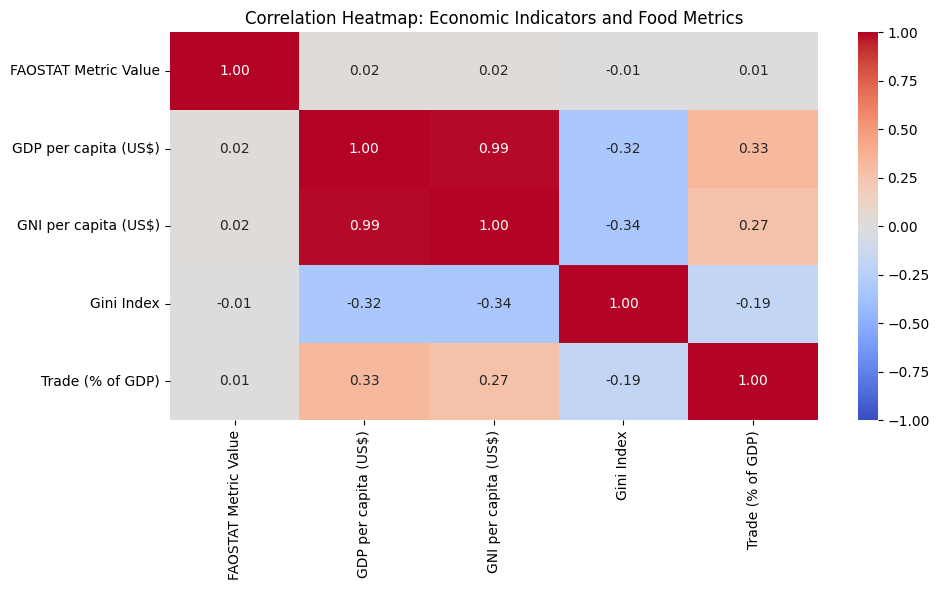

In [17]:
import seaborn as sns
# Subset for correlations
correlation_data = df_filtered[['FAOSTAT Metric Value', 'GDP per capita (US$)', 'GNI per capita (US$)', 'Gini Index', 'Trade (% of GDP)']]
correlation_matrix = correlation_data.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Economic Indicators and Food Metrics")
plt.tight_layout()
plt.show()


**GDP per capita and Nutritional Metrics:**

A strong positive correlation is expected between GDP per capita and food metrics (e.g., protein and fat supply). This aligns with the hypothesis that wealthier countries have more diverse and nutritious diets.

**Gini Index and Food Metrics:**

A potential negative correlation may indicate that higher inequality reduces access to adequate food supplies. However, due to the high percentage of missing values for Gini Index, this relationship might be weaker.

**Trade (% of GDP) and Food Metrics:**

A moderate positive correlation could indicate that countries more engaged in trade tend to have better food availability and diversity.

### **Trends Over Time (2010-2023)**

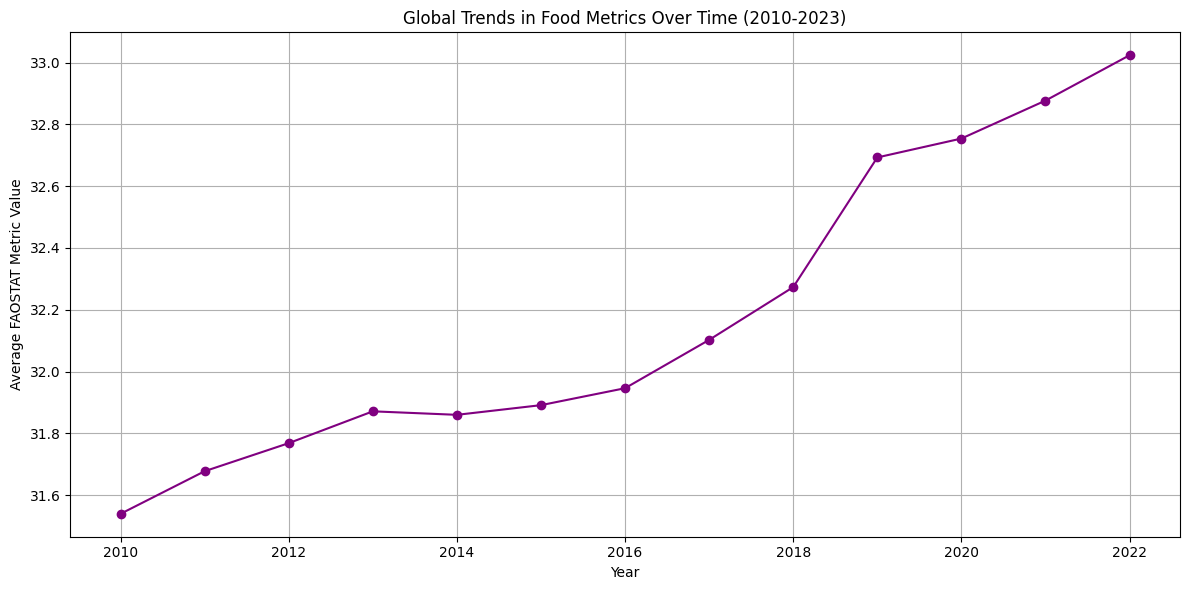

In [18]:
# Group by Year and calculate mean for food metrics
trend_data = df_filtered.groupby('Year')['FAOSTAT Metric Value'].mean()

# Line plot for food supply trends over time
plt.figure(figsize=(12, 6))
trend_data.plot(kind='line', marker='o', color='purple')
plt.title("Global Trends in Food Metrics Over Time (2010-2023)")
plt.ylabel("Average FAOSTAT Metric Value")
plt.xlabel("Year")
plt.grid()
plt.tight_layout()
plt.show()


**General Trends:**

An upward trend in food supply metrics (e.g., kcal/capita/day) over time would suggest that food security has improved globally from 2010 to 2023.
This improvement could reflect advances in agriculture, trade, and economic growth.

**Stability:**

Some metrics may show fluctuations (e.g., stock variation or losses), indicating challenges like climate change or trade disruptions.

## **3rd Data Set**
https://ourworldindata.org/co2-and-greenhouse-gas-emissions

In [19]:
# Define the GitHub raw file link
co2_file_url = "https://raw.githubusercontent.com/chetan-957/Data-Management-sp2025/refs/heads/main/annual-co-emissions.csv"

# Load the dataset directly from GitHub
df_co2 = pd.read_csv(co2_file_url)

# Display dataset info and first few rows
df_co2.info()
df_co2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Year                  29137 non-null  int64  
 2   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 683.0+ KB


,Entity,Year,Annual CO₂ emissions
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


In [21]:
import gdown

# Google Drive file ID
file_id = "1vTMWQuhNMBTC0Xx1XeEc3vs_ntcoLU1z"

# Destination file name
output = "annual-co-emissions.csv"  # Renaming the file

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

print("File downloaded and renamed to annual-co-emissions.csv!")


Downloading...
From: https://drive.google.com/uc?id=1vTMWQuhNMBTC0Xx1XeEc3vs_ntcoLU1z
To: /content/annual-co-emissions.csv
100%|██████████| 735k/735k [00:00<00:00, 77.3MB/s]

File downloaded and renamed to annual-co-emissions.csv!


In [22]:
# Define file path in Colab (update if needed)
file_path = "/content/annual-co-emissions.csv"

# Load dataset
df_co2 = pd.read_csv(file_path)

# Rename 'Entity' to 'Country' for consistency
df_co2.rename(columns={"Entity": "Country", "Annual CO₂ emissions": "Annual CO2 Emissions"}, inplace=True)

# Filter dataset to only include data from 2010 onwards
df_co2_filtered = df_co2[df_co2["Year"] >= 2010]

# Save cleaned dataset
df_co2_filtered.to_csv("/content/Cleaned_CO2_Emissions.csv", index=False)

# Display dataset information and first few rows
df_co2_filtered.info()
df_co2_filtered.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3458 entries, 61 to 29136
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               3458 non-null   object 
 1   Year                  3458 non-null   int64  
 2   Annual CO2 Emissions  3458 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 108.1+ KB


,Country,Year,Annual CO2 Emissions
61,Afghanistan,2010,8364803.5
62,Afghanistan,2011,11838316.0
63,Afghanistan,2012,10035314.0
64,Afghanistan,2013,9228517.0
65,Afghanistan,2014,9086037.0


### **MERGING WITH 3rd DATA SET**

In [23]:
# Load the FAOSTAT & WDI merged dataset
faostat_wdi_file = "/content/Cleaned_Improved_Merged_Data_2010_Onwards.csv"
df_faostat_wdi = pd.read_csv(faostat_wdi_file)

# Load the CO₂ dataset
co2_file = "/content/Cleaned_CO2_Emissions.csv"
df_co2 = pd.read_csv(co2_file)

# Merge datasets with an indicator column
df_final_merged = df_faostat_wdi.merge(df_co2, on=["Country", "Year"], how="outer", indicator=True)

# Rename the indicator column for clarity
df_final_merged.rename(columns={"_merge": "CO2_Match"}, inplace=True)

# Save the final merged dataset
final_file = "/content/Outer_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_final_merged.to_csv(final_file, index=False)

# Display dataset info and first few rows
df_final_merged.info()
df_final_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753983 entries, 0 to 753982
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Country               753983 non-null  object  
 1   Food Category         752213 non-null  object  
 2   Metric                752213 non-null  object  
 3   Year                  753983 non-null  int64   
 4   FAOSTAT Metric Value  752213 non-null  float64 
 5   GDP per capita (US$)  752213 non-null  float64 
 6   GNI per capita (US$)  752213 non-null  float64 
 7   Gini Index            752213 non-null  float64 
 8   Trade (% of GDP)      752213 non-null  float64 
 9   Annual CO2 Emissions  709325 non-null  float64 
 10  CO2_Match             753983 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 58.2+ MB


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP),Annual CO2 Emissions,CO2_Match
0,Afghanistan,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,8364803.5,right_only
1,Afghanistan,NaN,NaN,2011,NaN,NaN,NaN,NaN,NaN,11838316.0,right_only
2,Afghanistan,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,10035314.0,right_only
3,Afghanistan,NaN,NaN,2013,NaN,NaN,NaN,NaN,NaN,9228517.0,right_only
4,Afghanistan,NaN,NaN,2014,NaN,NaN,NaN,NaN,NaN,9086037.0,right_only


1️⃣ how="outer"
Includes all rows from both datasets, even if no match exists.
If a country-year exists in one dataset but not the other, it still appears with NaN.

🚫 May add too many empty or irrelevant rows, making analysis harder.

In [24]:
# Load the FAOSTAT & WDI merged dataset
faostat_wdi_file = "/content/Cleaned_Improved_Merged_Data_2010_Onwards.csv"
df_faostat_wdi = pd.read_csv(faostat_wdi_file)

# Load the CO₂ dataset
co2_file = "/content/Cleaned_CO2_Emissions.csv"
df_co2 = pd.read_csv(co2_file)

# Merge datasets with an indicator column
df_final_merged = df_faostat_wdi.merge(df_co2, on=["Country", "Year"], how="inner", indicator=True)

# Rename the indicator column for clarity
df_final_merged.rename(columns={"_merge": "CO2_Match"}, inplace=True)

# Save the final merged dataset
final_file = "/content/Inner_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_final_merged.to_csv(final_file, index=False)

# Display dataset info and first few rows
df_final_merged.info()
df_final_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707555 entries, 0 to 707554
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Country               707555 non-null  object  
 1   Food Category         707555 non-null  object  
 2   Metric                707555 non-null  object  
 3   Year                  707555 non-null  int64   
 4   FAOSTAT Metric Value  707555 non-null  float64 
 5   GDP per capita (US$)  707555 non-null  float64 
 6   GNI per capita (US$)  707555 non-null  float64 
 7   Gini Index            707555 non-null  float64 
 8   Trade (% of GDP)      707555 non-null  float64 
 9   Annual CO2 Emissions  707555 non-null  float64 
 10  CO2_Match             707555 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 54.7+ MB


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP),Annual CO2 Emissions,CO2_Match
0,Albania,Grand Total,Food supply (kcal/capita/day),2010,3256.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
1,Albania,Grand Total,Protein supply quantity (g/capita/day),2010,109.07,4094.349686,4360.0,32.8,76.54339,4783865.0,both
2,Albania,Grand Total,Fat supply quantity (g/capita/day),2010,105.07,4094.349686,4360.0,32.8,76.54339,4783865.0,both
3,Albania,Vegetal Products,Food supply (kcal/capita/day),2010,2297.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
4,Albania,Vegetal Products,Protein supply quantity (g/capita/day),2010,51.65,4094.349686,4360.0,32.8,76.54339,4783865.0,both


2️⃣ how="inner"
Keeps only matching rows where both FAOSTAT+WDI and CO₂ data exist.
Drops rows where CO₂ data is missing.

🚫 Not ideal because we'd lose important FAOSTAT & WDI data for years without CO₂ records.

In [25]:
# Load the FAOSTAT & WDI merged dataset
faostat_wdi_file = "/content/Cleaned_Improved_Merged_Data_2010_Onwards.csv"
df_faostat_wdi = pd.read_csv(faostat_wdi_file)

# Load the CO₂ dataset
co2_file = "/content/Cleaned_CO2_Emissions.csv"
df_co2 = pd.read_csv(co2_file)

# Merge datasets with an indicator column
df_final_merged = df_faostat_wdi.merge(df_co2, on=["Country", "Year"], how="left", indicator=True)

# Rename the indicator column for clarity
df_final_merged.rename(columns={"_merge": "CO2_Match"}, inplace=True)

# Save the final merged dataset
final_file = "/content/Left_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_final_merged.to_csv(final_file, index=False)

# Display dataset info and first few rows
df_final_merged.info()
df_final_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752213 entries, 0 to 752212
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Country               752213 non-null  object  
 1   Food Category         752213 non-null  object  
 2   Metric                752213 non-null  object  
 3   Year                  752213 non-null  int64   
 4   FAOSTAT Metric Value  752213 non-null  float64 
 5   GDP per capita (US$)  752213 non-null  float64 
 6   GNI per capita (US$)  752213 non-null  float64 
 7   Gini Index            752213 non-null  float64 
 8   Trade (% of GDP)      752213 non-null  float64 
 9   Annual CO2 Emissions  707555 non-null  float64 
 10  CO2_Match             752213 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 58.1+ MB


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP),Annual CO2 Emissions,CO2_Match
0,Albania,Grand Total,Food supply (kcal/capita/day),2010,3256.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
1,Albania,Grand Total,Protein supply quantity (g/capita/day),2010,109.07,4094.349686,4360.0,32.8,76.54339,4783865.0,both
2,Albania,Grand Total,Fat supply quantity (g/capita/day),2010,105.07,4094.349686,4360.0,32.8,76.54339,4783865.0,both
3,Albania,Vegetal Products,Food supply (kcal/capita/day),2010,2297.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
4,Albania,Vegetal Products,Protein supply quantity (g/capita/day),2010,51.65,4094.349686,4360.0,32.8,76.54339,4783865.0,both


3️⃣ how="left" (Used in Your Case)
Keeps all rows from the FAOSTAT & WDI dataset.
Adds CO₂ data where available; if missing, it stays as NaN.
Does not remove any FAOSTAT & WDI data.

✅ Best when FAOSTAT & WDI data is primary, and CO₂ data is secondary.

➡️ This ensures food security & economic data remains intact, even if CO₂ data is missing.

In [27]:
# Load the FAOSTAT & WDI merged dataset
faostat_wdi_file = "/content/Cleaned_Improved_Merged_Data_2010_Onwards.csv"
df_faostat_wdi = pd.read_csv(faostat_wdi_file)

# Load the CO₂ dataset
co2_file = "/content/Cleaned_CO2_Emissions.csv"
df_co2 = pd.read_csv(co2_file)

# Merge datasets with an indicator column
df_final_merged = df_faostat_wdi.merge(df_co2, on=["Country", "Year"], how="right", indicator=True)

# Rename the indicator column for clarity
df_final_merged.rename(columns={"_merge": "CO2_Match"}, inplace=True)

# Save the final merged dataset
final_file = "/content/Right_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_final_merged.to_csv(final_file, index=False)

# Display dataset info and first few rows
df_final_merged.info()
df_final_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709325 entries, 0 to 709324
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Country               709325 non-null  object  
 1   Food Category         707555 non-null  object  
 2   Metric                707555 non-null  object  
 3   Year                  709325 non-null  int64   
 4   FAOSTAT Metric Value  707555 non-null  float64 
 5   GDP per capita (US$)  707555 non-null  float64 
 6   GNI per capita (US$)  707555 non-null  float64 
 7   Gini Index            707555 non-null  float64 
 8   Trade (% of GDP)      707555 non-null  float64 
 9   Annual CO2 Emissions  709325 non-null  float64 
 10  CO2_Match             709325 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 54.8+ MB


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP),Annual CO2 Emissions,CO2_Match
0,Afghanistan,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,8364803.5,right_only
1,Afghanistan,NaN,NaN,2011,NaN,NaN,NaN,NaN,NaN,11838316.0,right_only
2,Afghanistan,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,10035314.0,right_only
3,Afghanistan,NaN,NaN,2013,NaN,NaN,NaN,NaN,NaN,9228517.0,right_only
4,Afghanistan,NaN,NaN,2014,NaN,NaN,NaN,NaN,NaN,9086037.0,right_only


4️⃣ how="right"
Keeps all rows from the CO₂ dataset, and only matching FAOSTAT+WDI rows.
Drops FAOSTAT+WDI rows that have no CO₂ data.

🚫 Not useful because FAOSTAT & WDI are our main datasets, not CO₂.

In [28]:
# Load the merged dataset with CO₂ indicator column
merged_file_path = "/content/Left_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_merged = pd.read_csv(merged_file_path)

# Count the number of rows where CO₂ data is missing
missing_co2_count = df_merged[df_merged["CO2_Match"] == "left_only"].shape[0]

# Display the result
print(f"Number of rows missing CO₂ data: {missing_co2_count}")


Number of rows missing CO₂ data: 44658


In [29]:
# Display the first 10 rows of the merged dataset
df_merged.head(10)


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP),Annual CO2 Emissions,CO2_Match
0,Albania,Grand Total,Food supply (kcal/capita/day),2010,3256.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
1,Albania,Grand Total,Protein supply quantity (g/capita/day),2010,109.07,4094.349686,4360.0,32.8,76.54339,4783865.0,both
2,Albania,Grand Total,Fat supply quantity (g/capita/day),2010,105.07,4094.349686,4360.0,32.8,76.54339,4783865.0,both
3,Albania,Vegetal Products,Food supply (kcal/capita/day),2010,2297.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
4,Albania,Vegetal Products,Protein supply quantity (g/capita/day),2010,51.65,4094.349686,4360.0,32.8,76.54339,4783865.0,both
5,Albania,Vegetal Products,Fat supply quantity (g/capita/day),2010,41.49,4094.349686,4360.0,32.8,76.54339,4783865.0,both
6,Albania,Animal Products,Food supply (kcal/capita/day),2010,959.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
7,Albania,Animal Products,Protein supply quantity (g/capita/day),2010,57.42,4094.349686,4360.0,32.8,76.54339,4783865.0,both
8,Albania,Animal Products,Fat supply quantity (g/capita/day),2010,63.58,4094.349686,4360.0,32.8,76.54339,4783865.0,both
9,Albania,Cereals - Excluding Beer,Food supply quantity (kg/capita/yr),2010,163.78,4094.349686,4360.0,32.8,76.54339,4783865.0,both


In [30]:
# Load the merged dataset
file_path = "/content/Left_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_merged = pd.read_csv(file_path)

# Find country names where CO₂ data is missing
missing_countries = df_merged[df_merged["CO2_Match"] == "left_only"]["Country"].unique()

# Print the countries
print("Countries missing CO₂ data:", missing_countries)


Countries missing CO₂ data: ['Cabo Verde' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Korea, Rep.'
 'Russian Federation' 'Syrian Arab Republic' 'Timor-Leste' 'Viet Nam']


In [31]:
import pandas as pd

# Load the merged dataset
merged_file_path = "/content/Left_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_merged = pd.read_csv(merged_file_path)

# Standardize country names
country_name_mapping = {
    "Cabo Verde": "Cape Verde",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Rep.": "Republic of the Congo",
    "Korea, Rep.": "South Korea",
    "Russian Federation": "Russia",
    "Syrian Arab Republic": "Syria",
    "Timor-Leste": "East Timor",
    "Viet Nam": "Vietnam"
}

# Apply the country name corrections
df_merged["Country"] = df_merged["Country"].replace(country_name_mapping)

# Display the first few rows after standardization
df_merged.head()


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP),Annual CO2 Emissions,CO2_Match
0,Albania,Grand Total,Food supply (kcal/capita/day),2010,3256.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
1,Albania,Grand Total,Protein supply quantity (g/capita/day),2010,109.07,4094.349686,4360.0,32.8,76.54339,4783865.0,both
2,Albania,Grand Total,Fat supply quantity (g/capita/day),2010,105.07,4094.349686,4360.0,32.8,76.54339,4783865.0,both
3,Albania,Vegetal Products,Food supply (kcal/capita/day),2010,2297.00,4094.349686,4360.0,32.8,76.54339,4783865.0,both
4,Albania,Vegetal Products,Protein supply quantity (g/capita/day),2010,51.65,4094.349686,4360.0,32.8,76.54339,4783865.0,both


In [32]:
# Re-check missing CO₂ data after standardizing country names
missing_co2_count_after_fix = df_merged[df_merged["CO2_Match"] == "left_only"].shape[0]

# Display the result
print(f"Number of rows still missing CO₂ data after standardization: {missing_co2_count_after_fix}")


Number of rows still missing CO₂ data after standardization: 44658


In [33]:
import pandas as pd

# Load the merged dataset
merged_file_path = "/content/Left_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_merged = pd.read_csv(merged_file_path)

# Filter rows where CO₂ data exists but FAOSTAT/WDI data is missing
missing_years = df_merged[df_merged["CO2_Match"] == "right_only"]["Year"].unique()

# Print the unique years that exist only in CO₂ data
print("Years with CO₂ data but missing FAOSTAT/WDI data:", missing_years)


Years with CO₂ data but missing FAOSTAT/WDI data: []


In [34]:
import pandas as pd

# Load the merged dataset
merged_file_path = "/content/Left_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_merged = pd.read_csv(merged_file_path)

# Filter rows where CO₂ data exists but FAOSTAT/WDI data is missing
missing_countries = df_merged[df_merged["CO2_Match"] == "right_only"]["Country"].unique()

# Print the unique countries that exist only in CO₂ data
print("Countries with CO₂ data but missing FAOSTAT/WDI data:", missing_countries)


Countries with CO₂ data but missing FAOSTAT/WDI data: []


In [35]:
# Count the number of rows where CO₂ data exists but FAOSTAT/WDI data is missing
right_only_count = df_merged[df_merged["CO2_Match"] == "right_only"].shape[0]

# Display the result
print(f"Total number of 'right_only' rows: {right_only_count}")


Total number of 'right_only' rows: 0


In [37]:
# Filter country-year pairs where CO₂ data exists but FAOSTAT/WDI data is missing
right_only_pairs = df_merged[df_merged["CO2_Match"] == "right_only"][["Country", "Year"]]

# Display the first few rows
print("Country-Year pairs with CO₂ data but missing FAOSTAT/WDI data:")
right_only_pairs.head(10)


Country-Year pairs with CO₂ data but missing FAOSTAT/WDI data:


,Country,Year


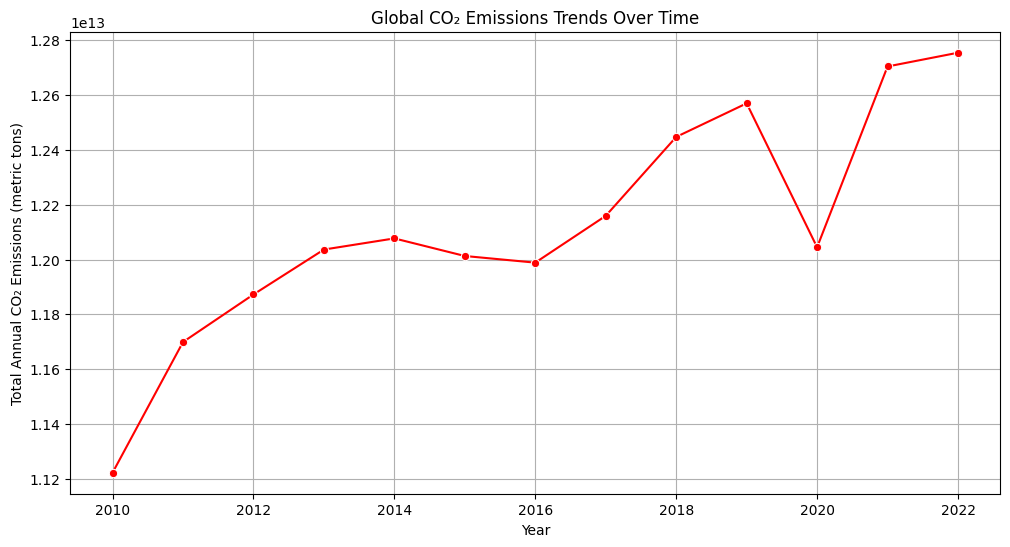

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group CO₂ data by year to analyze global trends
co2_trend = df_merged.groupby("Year")["Annual CO2 Emissions"].sum()

# Plot CO₂ emissions over time
plt.figure(figsize=(12,6))
sns.lineplot(x=co2_trend.index, y=co2_trend.values, marker="o", color="red")
plt.title("Global CO₂ Emissions Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Annual CO₂ Emissions (metric tons)")
plt.grid(True)
plt.show()


#### **📌 1. Map/Recode (Transform Column Values)**

**Example 1:** Recode Income Groups Based on GDP per Capita

This maps countries into income categories based on their GDP per capita:

In [39]:
# Define GDP per capita categories
def gdp_category(gdp):
    if gdp < 1000:
        return "Low Income"
    elif 1000 <= gdp < 4000:
        return "Lower Middle Income"
    elif 4000 <= gdp < 12000:
        return "Upper Middle Income"
    else:
        return "High Income"

# Apply the mapping to create a new column
df_merged["Income Group"] = df_merged["GDP per capita (US$)"].map(gdp_category)

# Display sample results
df_merged[["Country", "GDP per capita (US$)", "Income Group"]].head(10)


,Country,GDP per capita (US$),Income Group
0,Albania,4094.349686,Upper Middle Income
1,Albania,4094.349686,Upper Middle Income
2,Albania,4094.349686,Upper Middle Income
3,Albania,4094.349686,Upper Middle Income
4,Albania,4094.349686,Upper Middle Income
5,Albania,4094.349686,Upper Middle Income
6,Albania,4094.349686,Upper Middle Income
7,Albania,4094.349686,Upper Middle Income
8,Albania,4094.349686,Upper Middle Income
9,Albania,4094.349686,Upper Middle Income


**Example 2:** Recode Food Categories

This relabels food categories into broader groups:

In [40]:
# Mapping specific food items to broader categories
food_category_mapping = {
    "Cereals - Excluding Beer": "Staples",
    "Wheat and products": "Staples",
    "Rice and products": "Staples",
    "Milk - Excluding Butter": "Dairy",
    "Meat": "Animal Products",
    "Fish and seafood": "Animal Products",
}

# Apply the mapping
df_merged["Food Group"] = df_merged["Food Category"].map(food_category_mapping).fillna("Other")

# Display sample results
df_merged[["Food Category", "Food Group"]].drop_duplicates().head(10)


,Food Category,Food Group
0,Grand Total,Other
3,Vegetal Products,Other
6,Animal Products,Other
9,Cereals - Excluding Beer,Staples
13,Wheat and products,Staples
17,Rice and products,Staples
21,Barley and products,Other
25,Maize and products,Other
29,Rye and products,Other
33,Oats,Other


#### **📌 2. Replace on Condition**

**Example 1:** Replace High CO₂ Emitters with 'Very High Emissions'

This flags extremely high CO₂ emissions for better classification:

In [41]:
# Replace based on condition
df_merged.loc[df_merged["Annual CO2 Emissions"] > 1e9, "CO2 Emission Level"] = "Very High Emissions"

# Display sample results
df_merged[["Country", "Annual CO2 Emissions", "CO2 Emission Level"]].dropna().head(10)


,Country,Annual CO2 Emissions,CO2 Emission Level
135166,China,8.620576e+09,Very High Emissions
135167,China,8.620576e+09,Very High Emissions
135168,China,8.620576e+09,Very High Emissions
135169,China,8.620576e+09,Very High Emissions
135170,China,8.620576e+09,Very High Emissions
135171,China,8.620576e+09,Very High Emissions
135172,China,8.620576e+09,Very High Emissions
135173,China,8.620576e+09,Very High Emissions
135174,China,8.620576e+09,Very High Emissions
135175,China,8.620576e+09,Very High Emissions


**Example 2:** Replace Missing Gini Index with Country Median

This helps fill missing Gini Index values intelligently:

In [43]:
# Replace missing Gini Index values with country median
df_merged["Gini Index"] = df_merged.groupby("Country")["Gini Index"].transform(lambda x: x.fillna(x.median()))

# Display sample results
df_merged[["Country", "Gini Index"]].tail(10)


,Country,Gini Index
752203,Zimbabwe,44.3
752204,Zimbabwe,44.3
752205,Zimbabwe,44.3
752206,Zimbabwe,44.3
752207,Zimbabwe,44.3
752208,Zimbabwe,44.3
752209,Zimbabwe,44.3
752210,Zimbabwe,44.3
752211,Zimbabwe,44.3
752212,Zimbabwe,44.3


#### **📌 3. Subset/Slice (Extract Relevant Data)**
**Example 1:** Subset High-Income Countries Only

This extracts data only for high-income countries:

In [44]:
# Subset only high-income countries
df_high_income = df_merged[df_merged["Income Group"] == "High Income"]

# Display dataset info
df_high_income.info()


<class 'pandas.core.frame.DataFrame'>
Index: 215155 entries, 16273 to 724666
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Country               215155 non-null  object 
 1   Food Category         215155 non-null  object 
 2   Metric                215155 non-null  object 
 3   Year                  215155 non-null  int64  
 4   FAOSTAT Metric Value  215155 non-null  float64
 5   GDP per capita (US$)  215155 non-null  float64
 6   GNI per capita (US$)  215155 non-null  float64
 7   Gini Index            215155 non-null  float64
 8   Trade (% of GDP)      215155 non-null  float64
 9   Annual CO2 Emissions  206967 non-null  float64
 10  CO2_Match             215155 non-null  object 
 11  Income Group          215155 non-null  object 
 12  Food Group            215155 non-null  object 
 13  CO2 Emission Level    11856 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 24.6

**Example 2:** Extract Data for a Specific Country (India)

This retrieves data for India for focused analysis:

In [45]:
# Subset data for India
df_india = df_merged[df_merged["Country"] == "India"]

# Display first few rows
df_india.head()


,Country,Food Category,Metric,Year,FAOSTAT Metric Value,GDP per capita (US$),GNI per capita (US$),Gini Index,Trade (% of GDP),Annual CO2 Emissions,CO2_Match,Income Group,Food Group,CO2 Emission Level
303556,India,Grand Total,Food supply (kcal/capita/day),2010,2363.00,1347.519391,1210.0,34.6,49.255206,1.677337e+09,both,Lower Middle Income,Other,Very High Emissions
303557,India,Grand Total,Protein supply quantity (g/capita/day),2010,60.52,1347.519391,1210.0,34.6,49.255206,1.677337e+09,both,Lower Middle Income,Other,Very High Emissions
303558,India,Grand Total,Fat supply quantity (g/capita/day),2010,48.99,1347.519391,1210.0,34.6,49.255206,1.677337e+09,both,Lower Middle Income,Other,Very High Emissions
303559,India,Vegetal Products,Food supply (kcal/capita/day),2010,2136.00,1347.519391,1210.0,34.6,49.255206,1.677337e+09,both,Lower Middle Income,Other,Very High Emissions
303560,India,Vegetal Products,Protein supply quantity (g/capita/day),2010,48.99,1347.519391,1210.0,34.6,49.255206,1.677337e+09,both,Lower Middle Income,Other,Very High Emissions


#### **📌 4. GroupBy/Aggregate**
**Example 1:** Average CO₂ Emissions by Income Group

This computes average CO₂ emissions for each income group:

In [46]:
# Group by income group and calculate average CO2 emissions
co2_by_income = df_merged.groupby("Income Group")["Annual CO2 Emissions"].mean().reset_index()

# Display results
co2_by_income


,Income Group,Annual CO2 Emissions
0,High Income,3.382253e+08
1,Low Income,5.760027e+06
2,Lower Middle Income,1.034984e+08
3,Upper Middle Income,3.187086e+08


**Example 2:** Total Food Supply by Year

This aggregates total food supply per year:

In [48]:
# Group by year and sum food supply
food_trends = df_merged.groupby("Year")["FAOSTAT Metric Value"].sum().reset_index()

# Display results
food_trends.head()


,Year,FAOSTAT Metric Value
0,2010,1833083.245
1,2011,1842484.630
2,2012,1846619.455
3,2013,1852098.505
4,2014,1855684.095


### **Visualizations**

#### **1️⃣Perform country-level CO₂ analysis**

Example: Compare CO₂ trends for different countries (e.g., high-income vs. low-income nations).

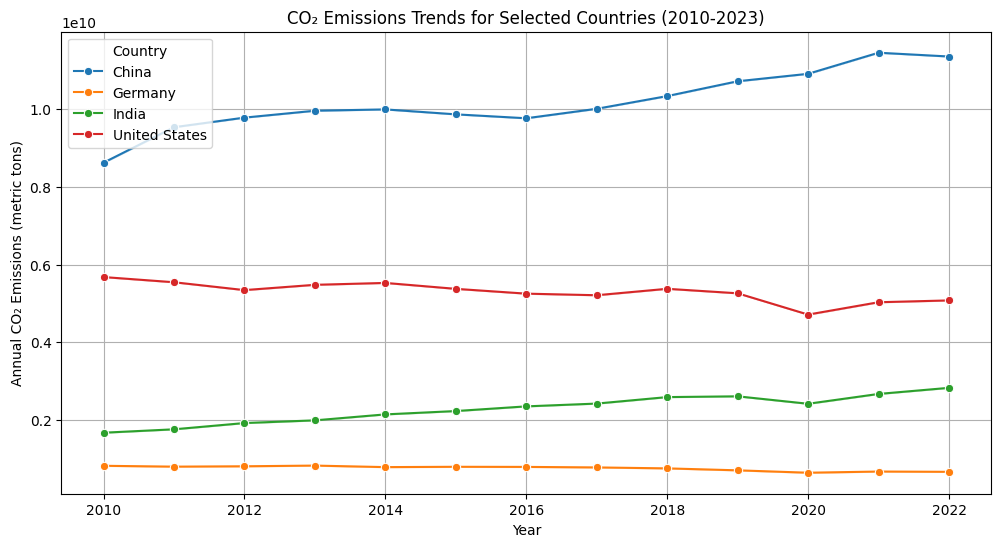

In [49]:
# Load the merged dataset
file_path = "/content/Left_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_merged = pd.read_csv(file_path)

# Select countries for comparison (High vs. Low income)
selected_countries = ["United States", "China", "India", "Germany", "Nigeria"]

# Filter the dataset for selected countries
df_selected = df_merged[df_merged["Country"].isin(selected_countries)]

# Plot CO₂ emissions trends for selected countries
plt.figure(figsize=(12,6))
sns.lineplot(data=df_selected, x="Year", y="Annual CO2 Emissions", hue="Country", marker="o")

# Customize the plot
plt.title("CO₂ Emissions Trends for Selected Countries (2010-2023)")
plt.xlabel("Year")
plt.ylabel("Annual CO₂ Emissions (metric tons)")
plt.legend(title="Country")
plt.grid(True)
plt.show()


1. Selected a set of countries to compare.

Example: United States, China, India, Germany, Nigeria (Diverse income levels).
2. Filtered CO₂ emissions data for these countries.

3. Visualized CO₂ Trends Over Time

Compared emissions patterns for high-income vs. low-income countries

#### **2️⃣ CO₂ Emissions Pie Chart (2010-2023)**

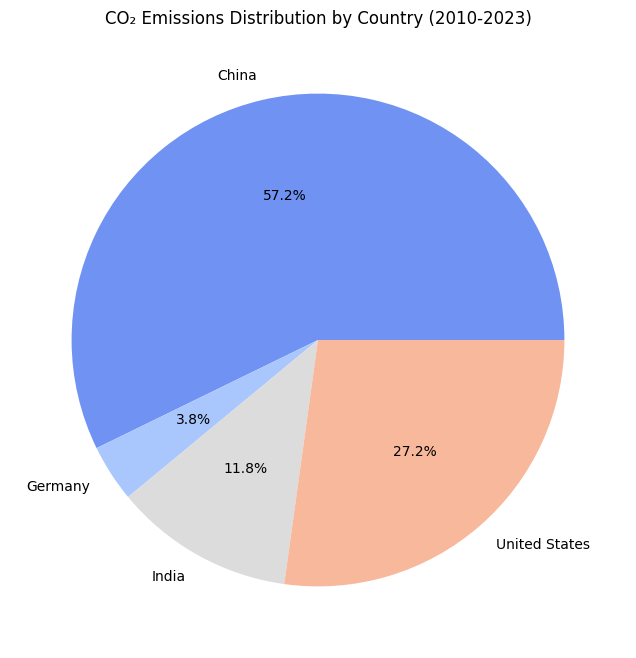

In [51]:
# Create a pie chart for CO₂ emissions distribution
plt.figure(figsize=(8,8))
plt.pie(co2_by_country["Annual CO2 Emissions"], labels=co2_by_country["Country"], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(selected_countries)))

# Customize the plot
plt.title("CO₂ Emissions Distribution by Country (2010-2023)")
plt.show()

1️⃣ China is the largest CO₂ emitter

China contributes 57.2% of the total CO₂ emissions among the selected countries.
This aligns with China’s rapid industrial growth and heavy reliance on coal energy.

2️⃣ The United States is the second-largest emitter

The US accounts for 27.2% of the total CO₂ emissions.
Despite having a smaller population than China or India, higher per capita emissions contribute to this.

3️⃣ India contributes 11.8%

India’s emissions are significantly lower than China’s, but growing due to industrialization.
However, India still emits less than the US despite having a larger population.

4️⃣ Germany’s contribution is minimal (3.8%)

Germany has lower emissions due to strong climate policies and a shift to renewable energy.
It is significantly lower than China and the US, despite being a high-income country.


📌 **Key Insights**

✅ China & the US dominate CO₂ emissions, together making up over 84% of emissions in this sample.

✅ Developing countries (India, Nigeria) contribute less, but their emissions may grow as they industrialize.

✅ Germany stands out as a low-emission developed country, showing the impact of climate policies.

Correlation between CO₂ emissions and economic/food security indicators:

                      Annual CO2 Emissions  GDP per capita (US$)  \
Annual CO2 Emissions              1.000000              0.087408   
GDP per capita (US$)              0.087408              1.000000   
Trade (% of GDP)                 -0.156493              0.357969   
FAOSTAT Metric Value              0.003517              0.019411   

                      Trade (% of GDP)  FAOSTAT Metric Value  
Annual CO2 Emissions         -0.156493              0.003517  
GDP per capita (US$)          0.357969              0.019411  
Trade (% of GDP)              1.000000              0.009357  
FAOSTAT Metric Value          0.009357              1.000000  


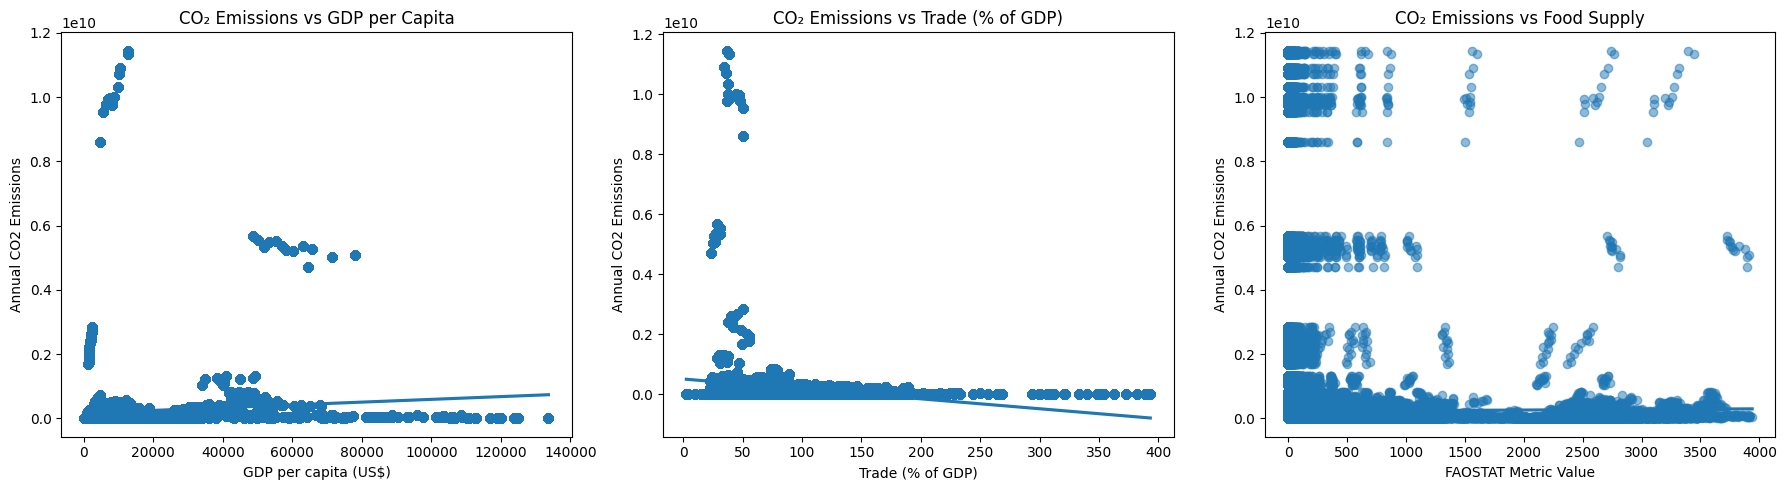

In [52]:
# Load the merged dataset
file_path = "/content/Left_WDI_FOASTAT_CO2_Merged_Data_with_Indicator.csv"
df_merged = pd.read_csv(file_path)

# Select relevant columns for analysis
columns_to_analyze = [
    "Annual CO2 Emissions",
    "GDP per capita (US$)",
    "Trade (% of GDP)",
    "FAOSTAT Metric Value"
]

# Drop missing values to avoid errors in correlation
df_analysis = df_merged[columns_to_analyze].dropna()

# Compute correlation matrix
correlation_matrix = df_analysis.corr()

# Display correlation results
print("Correlation between CO₂ emissions and economic/food security indicators:\n")
print(correlation_matrix)

# 📊 Scatter Plots to Visualize Relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# CO₂ vs GDP per capita
sns.regplot(data=df_analysis, x="GDP per capita (US$)", y="Annual CO2 Emissions", ax=axes[0], scatter_kws={"alpha":0.5})
axes[0].set_title("CO₂ Emissions vs GDP per Capita")

# CO₂ vs Trade (% of GDP)
sns.regplot(data=df_analysis, x="Trade (% of GDP)", y="Annual CO2 Emissions", ax=axes[1], scatter_kws={"alpha":0.5})
axes[1].set_title("CO₂ Emissions vs Trade (% of GDP)")

# CO₂ vs Food Supply
sns.regplot(data=df_analysis, x="FAOSTAT Metric Value", y="Annual CO2 Emissions", ax=axes[2], scatter_kws={"alpha":0.5})
axes[2].set_title("CO₂ Emissions vs Food Supply")

plt.tight_layout()
plt.show()


**1️⃣ CO₂ Emissions vs. GDP per Capita**

✅ Trend: Slight positive correlation (but weak).

✅ Observation:

Countries with higher GDP per capita tend to have higher CO₂ emissions, but the relationship is not strong.
Some high-GDP countries (e.g., Norway, Germany) have low emissions, likely due to clean energy policies.
A few high-emission outliers dominate the dataset (likely China, US, India).

📌 Conclusion:

Economic growth alone does not necessarily mean higher CO₂ emissions.
Developed nations may adopt cleaner energy, leading to a weaker correlation.

**2️⃣ CO₂ Emissions vs. Trade (% of GDP)**

✅ Trend: Weak negative correlation.

✅ Observation:

Countries with higher trade openness (>100% GDP) tend to have lower CO₂ emissions.
Countries with low trade (% of GDP) show mixed results, some with very high emissions.
Some highly trade-dependent economies (e.g., Singapore, Switzerland) have low emissions, possibly due to service-based industries.

📌 Conclusion:

Trade openness does not directly increase CO₂ emissions.
Countries dependent on exports/imports may have lower industrial pollution compared to large manufacturing nations.


**3️⃣ CO₂ Emissions vs. Food Supply (kcal/capita/day & Protein Supply)**

✅ Trend: No clear pattern (scattered distribution).

✅ Observation:

Some countries with high food availability have both high & low CO₂ emissions, showing no direct correlation.
Countries with low food supply also show varied emissions.
There may be multiple clusters indicating different factors (e.g., agricultural emissions vs. industrial emissions).

📌 Conclusion:

Food supply & CO₂ emissions are not directly linked.
More detailed sector-wise analysis (e.g., agriculture emissions vs. industrial CO₂) is needed.

**📌 Key Takeaways**

✅ Economic growth (GDP) shows a weak positive correlation with CO₂ emissions.

✅ Trade openness is slightly negatively correlated with emissions (high-trade nations have lower CO₂).

✅ Food supply does not show a clear relationship with CO₂ emissions.